<a href="https://colab.research.google.com/github/ajaykumar080286/MachineLearning/blob/main/Adaboost_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [2]:
df=pd.DataFrame()

In [3]:
df['x1']=[1,2,3,4,5,6,6,7,9,9]
df['x2']=[5,3,6,8,1,9,5,8,9,2]
df['lable']=[1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,x1,x2,lable
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

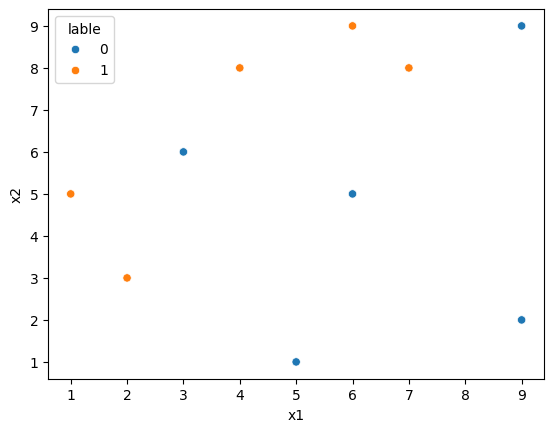

In [5]:
sns.scatterplot(x=df['x1'], y=df['x2'], hue=df['lable'])

In [6]:
df['weight']=1/df.shape[0]

In [7]:
df

,x1,x2,lable,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [8]:
dt=DecisionTreeClassifier(max_depth=1)

In [9]:
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [10]:
dt.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

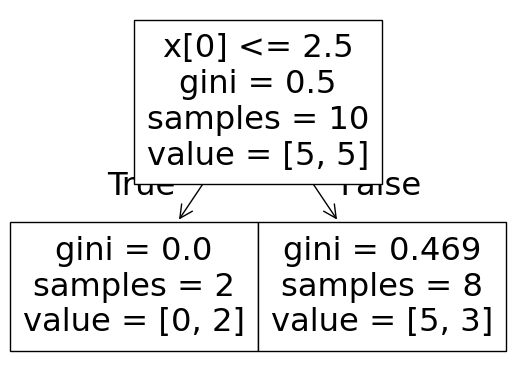

In [11]:
plot_tree(dt)

<Axes: >

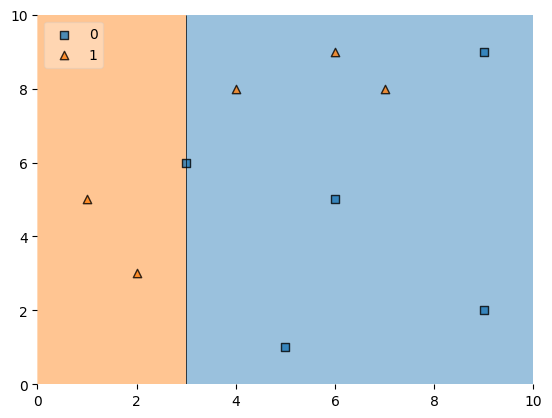

In [12]:
plot_decision_regions(X,y,clf=dt, legend=2)

In [13]:
df['predict']=dt.predict(X)

In [14]:
df

,x1,x2,lable,weight,predict
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [15]:
def calculaate_weight_model(error):
  return 0.5*np.log((1-error)/(error))

In [16]:
apha1=calculaate_weight_model(0.3)
apha1

np.float64(0.42364893019360184)

In [29]:
def update_row_weight(row,alpha=0.42):
  if row['lable']==row['predict']:
    return row['weight']*np.exp(-alpha)
  else:
    return row['weight']*np.exp(alpha)

In [31]:
df['update_weight']=df.apply(update_row_weight,axis=1)

In [32]:
df

,x1,x2,lable,weight,predict,update_weight
0,1,5,1,0.1,1,0.065705
1,2,3,1,0.1,1,0.065705
2,3,6,0,0.1,0,0.065705
3,4,8,1,0.1,0,0.152196
4,5,1,0,0.1,0,0.065705
5,6,9,1,0.1,0,0.152196
6,6,5,0,0.1,0,0.065705
7,7,8,1,0.1,0,0.152196
8,9,9,0,0.1,0,0.065705
9,9,2,0,0.1,0,0.065705


In [35]:
sum=df['update_weight'].sum()
sum

np.float64(0.91652124055613)

In [36]:
df['normalized_weight']=df['update_weight']/sum

In [37]:
df

,x1,x2,lable,weight,predict,update_weight,normalized_weight
0,1,5,1,0.1,1,0.065705,0.071689
1,2,3,1,0.1,1,0.065705,0.071689
2,3,6,0,0.1,0,0.065705,0.071689
3,4,8,1,0.1,0,0.152196,0.166059
4,5,1,0,0.1,0,0.065705,0.071689
5,6,9,1,0.1,0,0.152196,0.166059
6,6,5,0,0.1,0,0.065705,0.071689
7,7,8,1,0.1,0,0.152196,0.166059
8,9,9,0,0.1,0,0.065705,0.071689
9,9,2,0,0.1,0,0.065705,0.071689


In [38]:
df['normalized_weight'].sum()

np.float64(1.0)

In [39]:
df['cumsum_upper']=np.cumsum(df['normalized_weight'])

In [40]:
df

,x1,x2,lable,weight,predict,update_weight,normalized_weight,cumsum_upper
0,1,5,1,0.1,1,0.065705,0.071689,0.071689
1,2,3,1,0.1,1,0.065705,0.071689,0.143378
2,3,6,0,0.1,0,0.065705,0.071689,0.215068
3,4,8,1,0.1,0,0.152196,0.166059,0.381126
4,5,1,0,0.1,0,0.065705,0.071689,0.452815
5,6,9,1,0.1,0,0.152196,0.166059,0.618874
6,6,5,0,0.1,0,0.065705,0.071689,0.690563
7,7,8,1,0.1,0,0.152196,0.166059,0.856622
8,9,9,0,0.1,0,0.065705,0.071689,0.928311
9,9,2,0,0.1,0,0.065705,0.071689,1.000000


In [42]:
df['cumsum_lower']=df['cumsum_upper']-df['normalized_weight']

In [43]:
df

,x1,x2,lable,weight,predict,update_weight,normalized_weight,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065705,0.071689,0.071689,0.000000
1,2,3,1,0.1,1,0.065705,0.071689,0.143378,0.071689
2,3,6,0,0.1,0,0.065705,0.071689,0.215068,0.143378
3,4,8,1,0.1,0,0.152196,0.166059,0.381126,0.215068
4,5,1,0,0.1,0,0.065705,0.071689,0.452815,0.381126
5,6,9,1,0.1,0,0.152196,0.166059,0.618874,0.452815
6,6,5,0,0.1,0,0.065705,0.071689,0.690563,0.618874
7,7,8,1,0.1,0,0.152196,0.166059,0.856622,0.690563
8,9,9,0,0.1,0,0.065705,0.071689,0.928311,0.856622
9,9,2,0,0.1,0,0.065705,0.071689,1.000000,0.928311


In [45]:
df[['x1','x2','lable','weight','update_weight','normalized_weight','cumsum_lower','cumsum_upper']]

,x1,x2,lable,weight,update_weight,normalized_weight,cumsum_lower,cumsum_upper
0,1,5,1,0.1,0.065705,0.071689,0.000000,0.071689
1,2,3,1,0.1,0.065705,0.071689,0.071689,0.143378
2,3,6,0,0.1,0.065705,0.071689,0.143378,0.215068
3,4,8,1,0.1,0.152196,0.166059,0.215068,0.381126
4,5,1,0,0.1,0.065705,0.071689,0.381126,0.452815
5,6,9,1,0.1,0.152196,0.166059,0.452815,0.618874
6,6,5,0,0.1,0.065705,0.071689,0.618874,0.690563
7,7,8,1,0.1,0.152196,0.166059,0.690563,0.856622
8,9,9,0,0.1,0.065705,0.071689,0.856622,0.928311
9,9,2,0,0.1,0.065705,0.071689,0.928311,1.000000


In [46]:
df

,x1,x2,lable,weight,predict,update_weight,normalized_weight,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065705,0.071689,0.071689,0.000000
1,2,3,1,0.1,1,0.065705,0.071689,0.143378,0.071689
2,3,6,0,0.1,0,0.065705,0.071689,0.215068,0.143378
3,4,8,1,0.1,0,0.152196,0.166059,0.381126,0.215068
4,5,1,0,0.1,0,0.065705,0.071689,0.452815,0.381126
5,6,9,1,0.1,0,0.152196,0.166059,0.618874,0.452815
6,6,5,0,0.1,0,0.065705,0.071689,0.690563,0.618874
7,7,8,1,0.1,0,0.152196,0.166059,0.856622,0.690563
8,9,9,0,0.1,0,0.065705,0.071689,0.928311,0.856622
9,9,2,0,0.1,0,0.065705,0.071689,1.000000,0.928311


In [ ]:
def create